In [1]:
#Used for Styling
class color:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;"> Predict the likelihood of Liability Customer buying loans</span>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats,ttest_ind
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

###  <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;"> Read Data and understand each attribute

In [3]:
Data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
Data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Observation : 1
 <p style = "font-family:verdana;font-size: 18px"> 
Here based upon the Problem Statement the target Variable is <mark style = "color:red">Personal Loan</mark>
 </p>
<p style = "font-family:verdana;font-size: 18px"> 
Based on the Data below are the Numerical and Categorical Variables
<ul type="square" style = "font-family:verdana;font-size: 18px">Numerical Variables
    <li>ID - Which don't have any effect on the Target Variable "Personal Loan" which useful to maintain order of the data</li>
    <li>Age</li>
    <li>Experience</li>
    <li>Income</li>
    <li>Zip Code - Which Don't have any effect on the Target Cariable "Personal Loan"</li>
    <li>CCAvg - Avg spending on Credit Cards on Month</li>
    <li>Mortgage</li>
</ul>
<ul type="square" style = "font-family:verdana;font-size: 18px">Categorical Variables - As from above info() we can see these  values as numerical but they are Ordinal Categorical variables
    <li>Education - 1.UG 2.Graduate 3.Professional</li>
         <li>Family - Which Says Family Size</li>
    <li> Personal Loan -Did Customer accept loan or not</li>
    <li>Securitites Account - Does Customer have Customer account or not</li>
    <li>CD Account - Does Customer have Customer of Deposit Account or not</li>
    <li>Online - Does customer have internet banking</li>
     <li>CreditCard - Does customer have Credit Card issued by Bank</li>
</ul>
 </p>

### Observation : 2
<p style = "font-family:verdana;font-size: 18px"> 
Attributes Useful for our Analysis
Target Variable - Personal Loan.
    <b> Curse Of Dimensionality</b> is not Present in this DataSet
<ul type="square" style = "font-family:verdana;font-size: 18px">Numerical Variables
      <li>Age</li>
    <li>Experience</li>
    <li>Income</li>
    <li>CCAvg - Avg spending on Credit Cards on Month</li>
    <li>Mortgage</li>
</ul>
<ul type="square" style = "font-family:verdana;font-size: 18px">Categorical Variables
    <li>Education - 1.UG 2.Graduate 3.Professional - Ordinal Categorical Variable</li>
    <li> Personal Loan -Did Customer accept loan or not -  - Binary Categorical Variable - <b>Personal Loan - Target Variable</b></li>
        <li>Family - Which Says Family Size</li>
    <li>Securitites Account - Does Customer have Customer account or not- Binary Categorical Variable</li>
    <li>CD Account - Does Customer have Customer of Deposit Account or not - Binary Categorical Variable</li>
    <li>Online - Does customer have internet banking - Binary Categorical Variable</li>
     <li>CreditCard - Does customer have Credit Card issued by Bank - Binary Categorical Variable</li>
</ul>
</p>


###  <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;"> Check each Attribute

In [5]:
# Take Dataset with useful Data
Data_Set=Data.drop(['ID','ZIP Code'], axis =1)
Data_Set.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [6]:
print(color.UNDERLINE+color.BOLD+"Before removing two attributes No of Rows::"+color.END,Data.shape[0])
print(color.UNDERLINE+color.BOLD+"After removing two attributes No of Rows::"+color.END,Data_Set.shape[0])
print('\n')
print(color.UNDERLINE+color.BOLD+"Before removing two attributes No of columns::"+color.END,Data.shape[1])
print(color.UNDERLINE+color.BOLD+"After removing two attributes No of columns::"+color.END,Data_Set.shape[1])

Before removing two attributes No of Rows:: 5000
After removing two attributes No of Rows:: 5000


Before removing two attributes No of columns:: 14
After removing two attributes No of columns:: 12


In [7]:
# Five Point Summary

print(color.UNDERLINE+color.BOLD+"Five Point Summary::"+color.END)
print("\n")
Data_Set.describe().T[['min', '25%', '50%', '75%', 'max']]


Five Point Summary::




,min,25%,50%,75%,max
Age,23.0,35.0,45.0,55.0,67.0
Experience,-3.0,10.0,20.0,30.0,43.0
Income,8.0,39.0,64.0,98.0,224.0
Family,1.0,1.0,2.0,3.0,4.0
CCAvg,0.0,0.7,1.5,2.5,10.0
Education,1.0,1.0,2.0,3.0,3.0
Mortgage,0.0,0.0,0.0,101.0,635.0
Personal Loan,0.0,0.0,0.0,0.0,1.0
Securities Account,0.0,0.0,0.0,0.0,1.0
CD Account,0.0,0.0,0.0,0.0,1.0


### Observation : 3
<p style = "font-family:verdana;font-size: 18px"> 
<ul type="square" style = "font-family:verdana;font-size: 18px">
    <li><b>Experience </b>Attribute Min Value is "-3" which doesnot exist in real world - We'll deal with this <b>incorrect values</b> in the below section</li>
      <li>Mortgage Attribute looks like it is right skewed - We'll prove it through Visualization</li>
      <li>Income Attribute is normally distributed - We'll prove below this using Visualization</li>
      <li>Age Attribute is normally distributed where customers are between age group 35 to 55</li>
</ul>
</p>

In [8]:
#Mean,Median & Mode
pd.concat((pd.DataFrame(pd.concat((Data_Set.mean(),Data_Set.median()),axis=1)).rename(columns={0:'Mean',1:'Median'}),Data_Set.mode().T),axis=1).rename(columns={0:'Mode'})

,Mean,Median,Mode
Age,45.338400,45.0,35.0
Experience,20.104600,20.0,32.0
Income,73.774200,64.0,44.0
Family,2.396400,2.0,1.0
CCAvg,1.937938,1.5,0.3
Education,1.881000,2.0,1.0
Mortgage,56.498800,0.0,0.0
Personal Loan,0.096000,0.0,0.0
Securities Account,0.104400,0.0,0.0
CD Account,0.060400,0.0,0.0


### Observation : 4
<p style = "font-family:verdana;font-size: 18px"> 
<ul type="square" style = "font-family:verdana;font-size: 18px">
      <li>Age have Same Value for Mean and Median</li>
      <li>Experience have almost same value for Mean, Median</li>
    <li><b>Mortage</b> have large variation in Mean,Mode,Median - We'll Check <b>Outliers</b> in next section</li>
      </ul>
</p>


###  <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;"> Dealing with Duplicates,Missing Values and Outliers

In [9]:
#Duplicates
##Identify duplicates records in the data
dupes = Data_Set.duplicated()
print(color.UNDERLINE+color.BOLD+'Duplicates in the DataSet::'+color.END,sum(dupes))
Data_Set[Data_Set.duplicated()]

Duplicates in the DataSet:: 13


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
799,29,3,39,4,2.10,3,0,0,0,0,1,0
1026,28,4,43,3,0.10,2,0,0,0,0,1,0
1526,36,10,80,4,2.20,2,0,0,0,0,1,0
2031,60,35,80,3,0.50,1,0,0,0,0,1,0
2806,53,27,59,2,0.80,3,0,0,0,0,1,0
3050,50,25,58,1,1.30,2,0,0,0,0,1,0
3453,29,3,31,4,0.30,2,0,0,0,0,1,0
3694,38,8,21,1,0.67,3,0,0,0,0,1,0
4058,39,15,65,1,1.50,3,0,0,0,0,0,0
4482,40,14,28,2,0.80,3,0,0,0,0,0,0


In [10]:
#Null Values
print(color.UNDERLINE+color.BOLD+'NullValues in the DataSet::'+color.END,Data_Set.isnull().sum().sum())
pd.DataFrame( Data_Set.isnull().sum(), columns= ['Number of missing values'])

NullValues in the DataSet:: 0


,Number of missing values
Age,0
Experience,0
Income,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0
Securities Account,0
CD Account,0


Outliers in the DataSet::


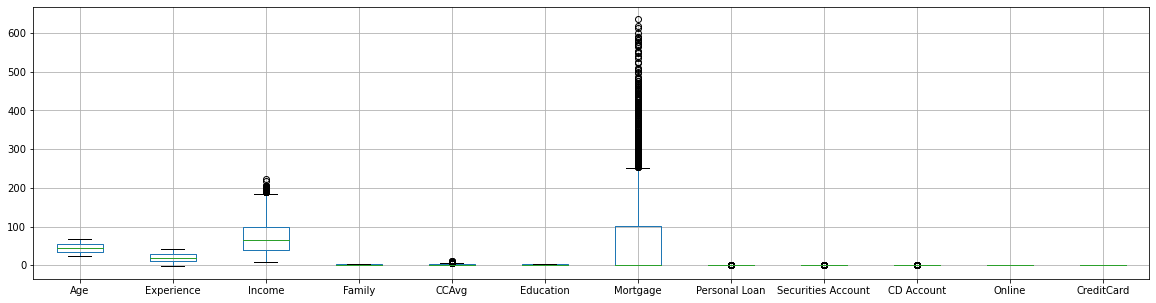

In [11]:
#Outliers
print(color.UNDERLINE+color.BOLD+'Outliers in the DataSet::'+color.END)
Data_Set.boxplot(return_type='axes',figsize=(20,5))

In [12]:
#InCorrect Values
# Checking whether any negative records are present in the Experience
print(color.UNDERLINE+color.BOLD+'Negative Values in the Experience Attribute::'+color.END)
print(Data_Set[Data_Set['Experience']<0]['Experience'].count())
print(color.BOLD+'Lisy of Negative Values in the Experience Attribute::'+color.END)
print(Data_Set[Data_Set['Experience']<0]['Experience'].value_counts())
print('')
print(color.UNDERLINE+color.BOLD+'Negative Values in the Age Attribute::'+color.END)
print(Data_Set[Data_Set['Age']<0]['Age'].count())
print('')
print(color.UNDERLINE+color.BOLD+'Negative Values in the Income Attribute::'+color.END)
print(Data_Set[Data_Set['Income']<0]['Income'].count())
print(color.UNDERLINE+color.BOLD+'Negative Values in the CCAvg Attribute::'+color.END)
print(Data_Set[Data_Set['CCAvg']<0]['CCAvg'].count())

Negative Values in the Experience Attribute::
52
Lisy of Negative Values in the Experience Attribute::
-1    33
-2    15
-3     4
Name: Experience, dtype: int64

Negative Values in the Age Attribute::
0

Negative Values in the Income Attribute::
0
Negative Values in the CCAvg Attribute::
0


### Observation : 5
<p style = "font-family:verdana;font-size: 18px"> 
<ul type="square" style = "font-family:verdana;font-size: 18px">
      <li>DataSet Contains 13 entries as Duplicates</li>
      <li>Outliers present to Income,Mortgage,CCAvg,Personal Loan,CdAccount,Securities Account. But Outliers effect is mostly on the Mortgage</li>
    <li>Experience Attribute have 52 Values which are less than 0 but in the Practical world it's not possible</li>
      </ul>
</p>

<p style = "font-family:verdana;font-size: 18px"><b>Note:</b> In Below section we'll drop duplicates and we'll analyse the Correlation of these attributes with other attributes. So that we can Clean the Experience Atrribute Accordingly</p>

###  <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;"> Clean Duplicate Values

In [13]:
print('Before Duplicate Removal',Data_Set.shape)
Data_Set=Data_Set.dropna()
Data_Set.drop_duplicates(inplace=True)
print('After Duplicate Removal',Data_Set.shape)

Before Duplicate Removal (5000, 12)
After Duplicate Removal (4987, 12)


###  <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;"> Dealing with Outliers
Here we are dealing only with Mortgage attribute where it have many outliers and for remaining atrributes the outliers effect is moderate

F:\PGP-AIML\Python_Projects\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


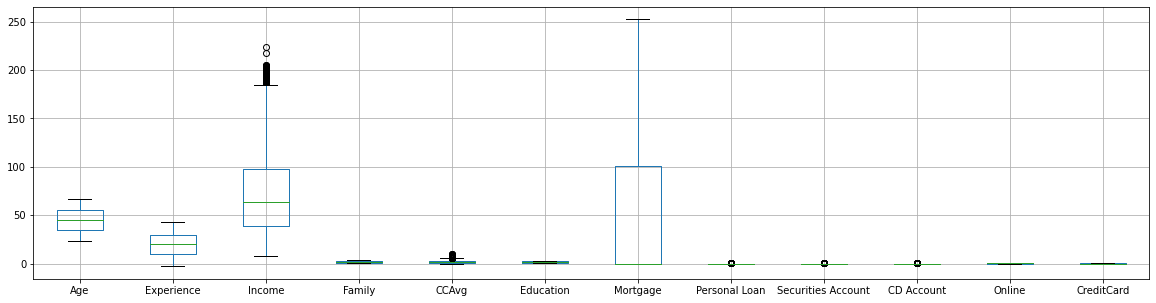

In [14]:
#Remove Using IQR
Q1 = Data_Set['Mortgage'].quantile(0.25)
Q3 = Data_Set['Mortgage'].quantile(0.75)
IQR = Q3 - Q1
for i in np.where(Data_Set['Mortgage'] > Q3 + 1.5 * IQR):
    Data_Set['Mortgage'].iloc[i] = Q3 + 1.5 * IQR
Data_Set.boxplot(return_type='axes',figsize=(20,5))

###  <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;"> Check Skewness & Correlation between attributes before Data Clean

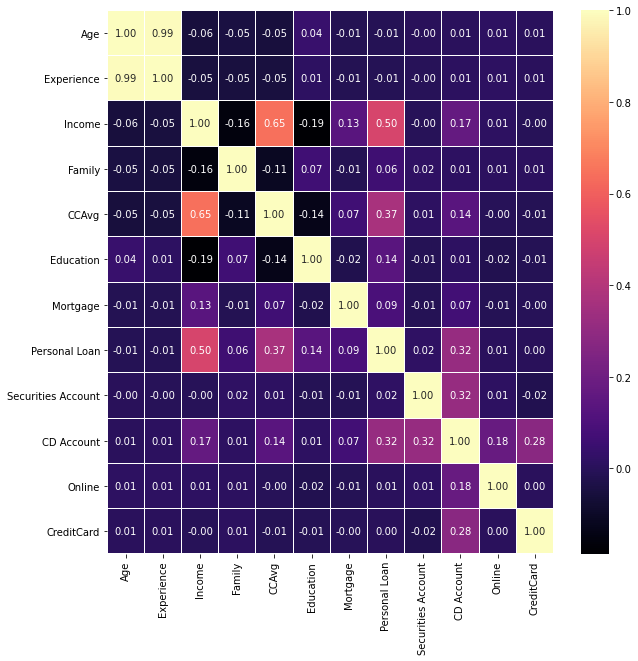

In [15]:
# Correlation between attributes
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(Data_Set.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

F:\PGP-AIML\Python_Projects\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
F:\PGP-AIML\Python_Projects\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
F:\PGP-AIML\Python_Projects\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


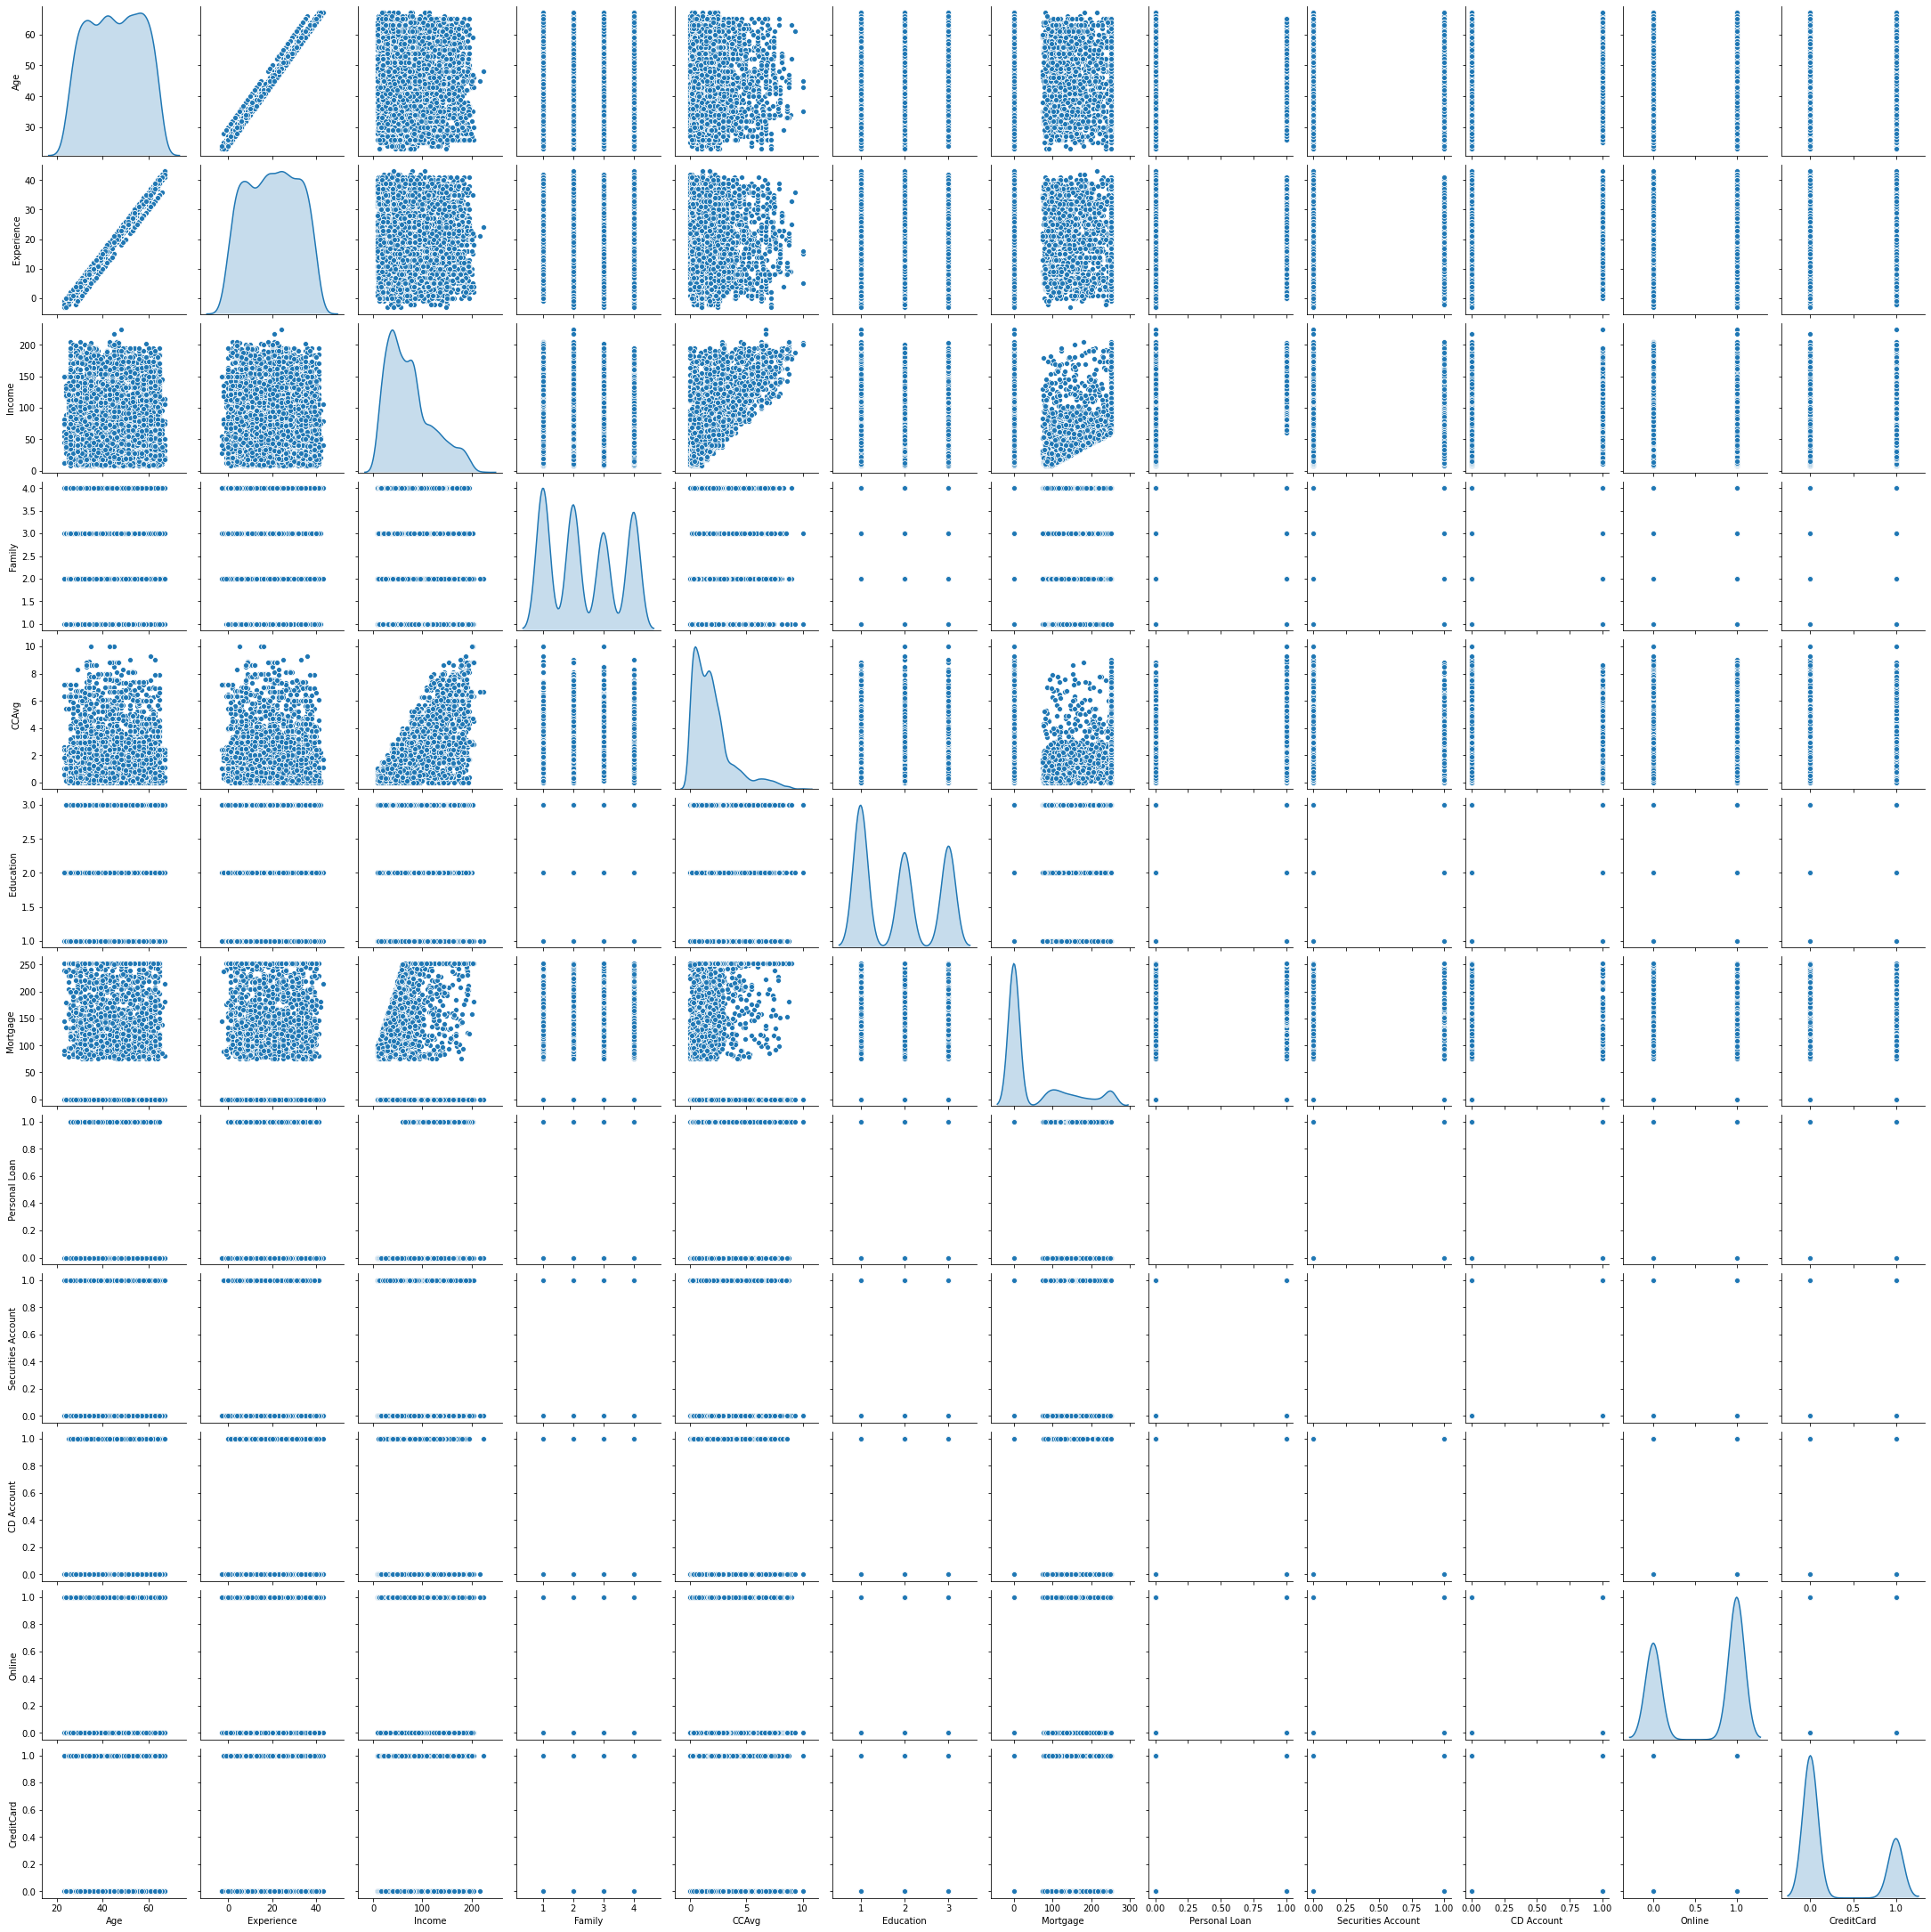

In [16]:
sns.pairplot(Data_Set,diag_kind='kde')
plt.show()

### Observation : 6
<p style = "font-family:verdana;font-size: 18px"> 
<ul type="square" style = "font-family:verdana;font-size: 18px">Income
      <li>Income and CCAvg have moderate Correlation with each other. </li>
      <li>Income and Personal Loan are moderately Correlated with each other. </li>
     <li>Income with Family and Education are Weakly Correlated</li>
      </ul>
      <ul type="square" style = "font-family:verdana;font-size: 18px">Age & Experience
         <li>Age and Experience are strongly Correlated with each other</li>
     <li>Age & Experience are Normally Distributed</li>
      </ul>
   <ul type="square" style = "font-family:verdana;font-size: 18px">
         <li>Income,Mortgage +& CCAvg are Positively Skewed</li>
         <li>Family,Education,Online & CreditCard are Bimodel Distribution i.e,, Bernoulli's Distribution</li>
      </ul> 
</p>

###  <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;">Univariate Distribution & Bivariate Distribution with Personal Loan

Personal Loan,0,1
Family,,
1,92.706203,7.293797
2,91.808346,8.191654
3,86.792453,13.207547
4,89.007383,10.992617


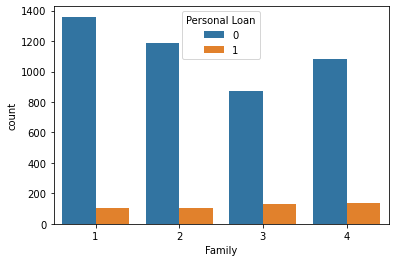

In [17]:
sns.countplot(Data_Set['Family'],hue=Data_Set['Personal Loan'])
pd.crosstab(Data_Set['Family'],Data_Set['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Education,,
1,95.560859,4.439141
2,86.990708,13.009292
3,86.269257,13.730743


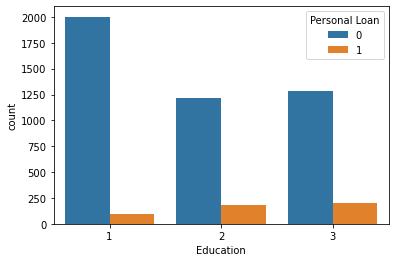

In [18]:
sns.countplot(Data_Set['Education'],hue=Data_Set['Personal Loan'])
pd.crosstab(Data_Set['Education'],Data_Set['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Securities Account,,
0,90.593505,9.406495
1,88.505747,11.494253


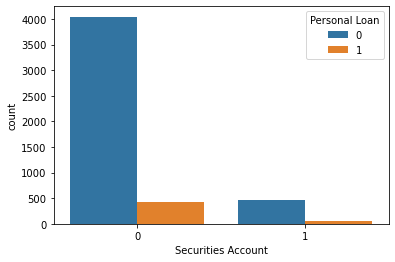

In [19]:
sns.countplot(Data_Set['Securities Account'],hue=Data_Set['Personal Loan'])
pd.crosstab(Data_Set['Securities Account'],Data_Set['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
CD Account,,
0,92.742796,7.257204
1,53.642384,46.357616


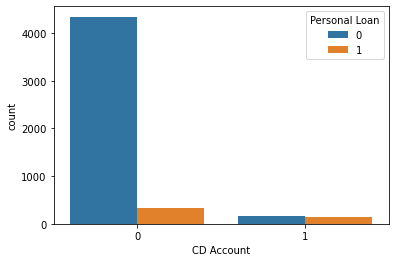

In [20]:
sns.countplot(Data_Set['CD Account'],hue=Data_Set['Personal Loan'])
pd.crosstab(Data_Set['CD Account'],Data_Set['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Online,,
0,90.615690,9.384310
1,90.211907,9.788093


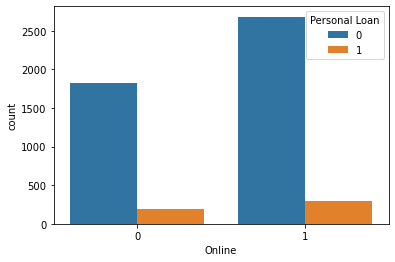

In [21]:
sns.countplot(Data_Set['Online'],hue=Data_Set['Personal Loan'])
pd.crosstab(Data_Set['Online'],Data_Set['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
CreditCard,,
0,90.420694,9.579306
1,90.265487,9.734513


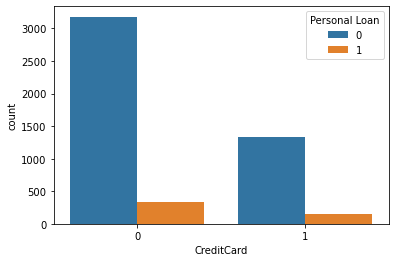

In [22]:
sns.countplot(Data_Set['CreditCard'],hue=Data_Set['Personal Loan'])
pd.crosstab(Data_Set['CreditCard'],Data_Set['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

### Observation : 7
<p style = "font-family:verdana;font-size: 18px"> 
<ul type="square" style = "font-family:verdana;font-size: 18px">
      <li>Most Personal Loans are accepted by the Customers with Family Size 3 and having Graduation as Qualification</li>
      <li>Customers who don't have Security Account almost those customers don't accept the personal Loan.Same Scenario follwed on CD Account</li>
    <li>Online Banking have less effect on the Personal Loan acceptance i.e,, If Customer have Online banking or not nearly 10% of them are showing interest to accept loan</li>
        </ul>
</p>

<Figure size 1440x720 with 0 Axes>

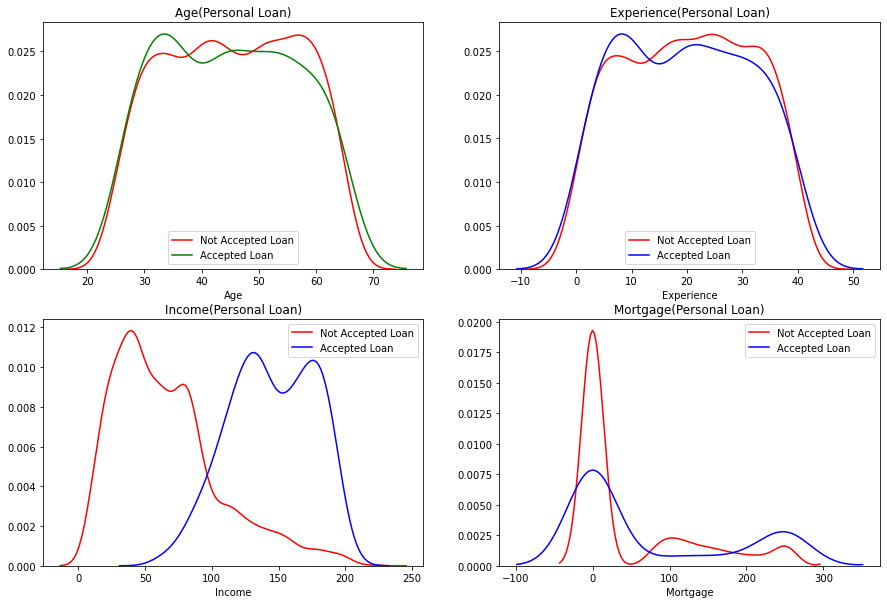

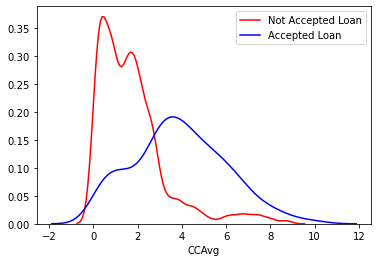

In [23]:
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(15)
sns.distplot(Data_Set[Data_Set['Personal Loan']==0]['Age'],color='r',hist=False,label="Not Accepted Loan",ax=ax[0][0])
sns.distplot(Data_Set[Data_Set['Personal Loan']==1]['Age'],color='g',hist=False,label="Accepted Loan",ax=ax[0][0])
ax[0][0].set_title('Age(Personal Loan)')
sns.distplot(Data_Set[Data_Set['Personal Loan']==0]['Experience'],color='r',hist=False,label="Not Accepted Loan",ax=ax[0][1])
sns.distplot(Data_Set[Data_Set['Personal Loan']==1]['Experience'],color='b',hist=False,label="Accepted Loan",ax=ax[0][1])
ax[0][1].set_title('Experience(Personal Loan)')
sns.distplot(Data_Set[Data_Set['Personal Loan']==0]['Income'],color='r',hist=False,label="Not Accepted Loan",ax=ax[1][0])
sns.distplot(Data_Set[Data_Set['Personal Loan']==1]['Income'],color='b',hist=False,label="Accepted Loan",ax=ax[1][0])
ax[1][0].set_title('Income(Personal Loan)')
sns.distplot(Data_Set[Data_Set['Personal Loan']==0]['Mortgage'],color='r',hist=False,label="Not Accepted Loan",ax=ax[1][1])
sns.distplot(Data_Set[Data_Set['Personal Loan']==1]['Mortgage'],color='b',hist=False,label="Accepted Loan",ax=ax[1][1])
ax[1][1].set_title('Mortgage(Personal Loan)')
plt.legend()
plt.show()
sns.distplot(Data_Set[Data_Set['Personal Loan']==0]['CCAvg'],color='r',hist=False,label="Not Accepted Loan")
sns.distplot(Data_Set[Data_Set['Personal Loan']==1]['CCAvg'],color='b',hist=False,label="Accepted Loan")


### Observation : 8
<p style = "font-family:verdana;font-size: 18px"> 
<ul type="square" style = "font-family:verdana;font-size: 18px">
      <li>As From above Distribution Age and Experience is not able to provide the clear distribution towards Personal Loan - There is <b> MultiCollinearity </b> between the Age and Experience Even in heatmap we can see that Strong Correlation Value </li>
      <li>Customers Who Accepted the Loan are the People with High Salary than the people who don't accept the Loan.So we can consider Income as one important Independent Attribute</li>
     <li>Average Spending on the credit Cards is more for the people who accepted the loan</li>
    <li>Customers want to have High Mortgage have opted for Personal Loan</li>
      </ul>
</p>
<p style = "font-family:verdana;font-size: 18px"><b>Note:</b> In the Below section let's compare the distribution between 
    <ul type="square" style = "font-family:verdana;font-size: 18px">
        <li>Age,Experience and Personal Loan</li>
        <li>Income Distribution with other Attributes along with Personal Loan</li>
        <li>Average Credit Card SpendingDistribution with other Attributes(Age,Education,Mortgage,Family,Online,Credit Card) along with Personal Loan</li>
        </ul></p>

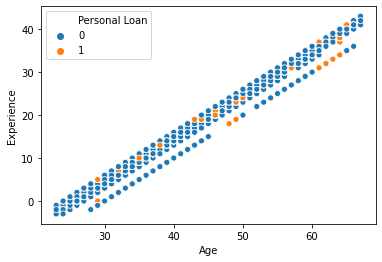

In [24]:
sns.scatterplot(Data_Set['Age'],Data_Set['Experience'],hue=Data_Set['Personal Loan'])

<Figure size 1440x1440 with 0 Axes>

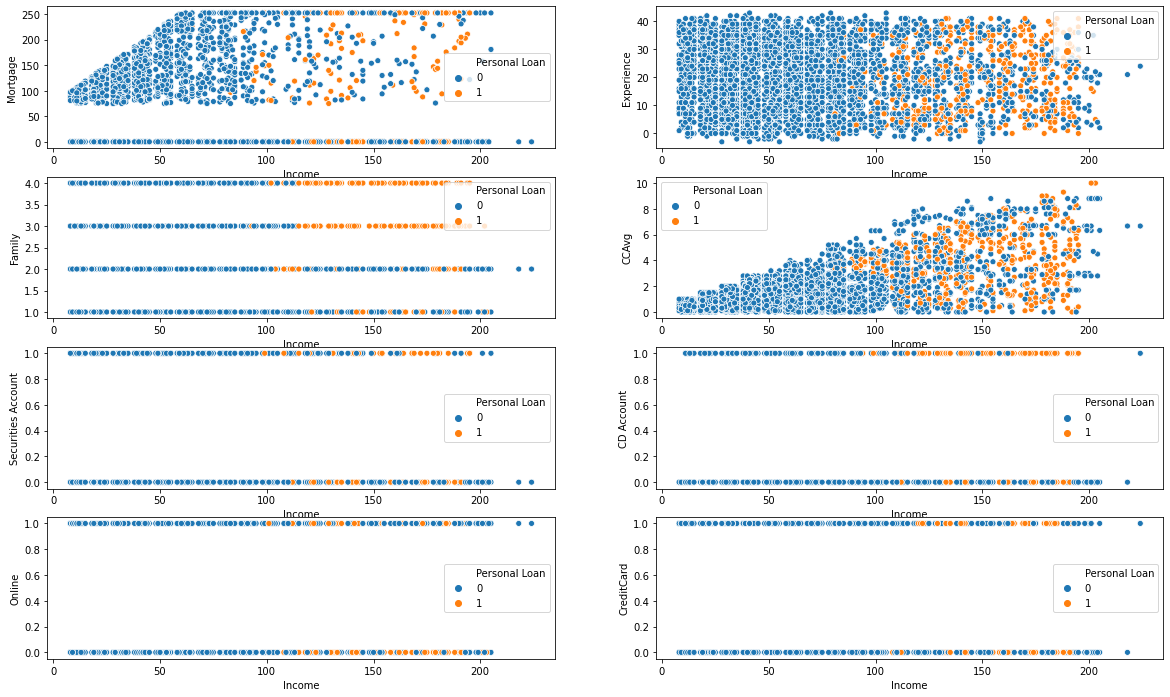

In [25]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots(4, 2)
fig.set_figheight(12)
fig.set_figwidth(20)
sns.scatterplot(Data_Set['Income'],Data_Set['Mortgage'],hue=Data_Set['Personal Loan'],ax=ax[0][0])
sns.scatterplot(Data_Set['Income'],Data_Set['Experience'],hue=Data_Set['Personal Loan'],ax=ax[0][1])
sns.scatterplot(Data_Set['Income'],Data_Set['Family'],hue=Data_Set['Personal Loan'],ax=ax[1][0])
sns.scatterplot(Data_Set['Income'],Data_Set['CCAvg'],hue=Data_Set['Personal Loan'],ax=ax[1][1])
sns.scatterplot(Data_Set['Income'],Data_Set['Securities Account'],hue=Data_Set['Personal Loan'],ax=ax[2][0])
sns.scatterplot(Data_Set['Income'],Data_Set['CD Account'],hue=Data_Set['Personal Loan'],ax=ax[2][1])
sns.scatterplot(Data_Set['Income'],Data_Set['Online'],hue=Data_Set['Personal Loan'],ax=ax[3][0])
sns.scatterplot(Data_Set['Income'],Data_Set['CreditCard'],hue=Data_Set['Personal Loan'],ax=ax[3][1])
plt.legend()
plt.show()

<Figure size 1440x1440 with 0 Axes>

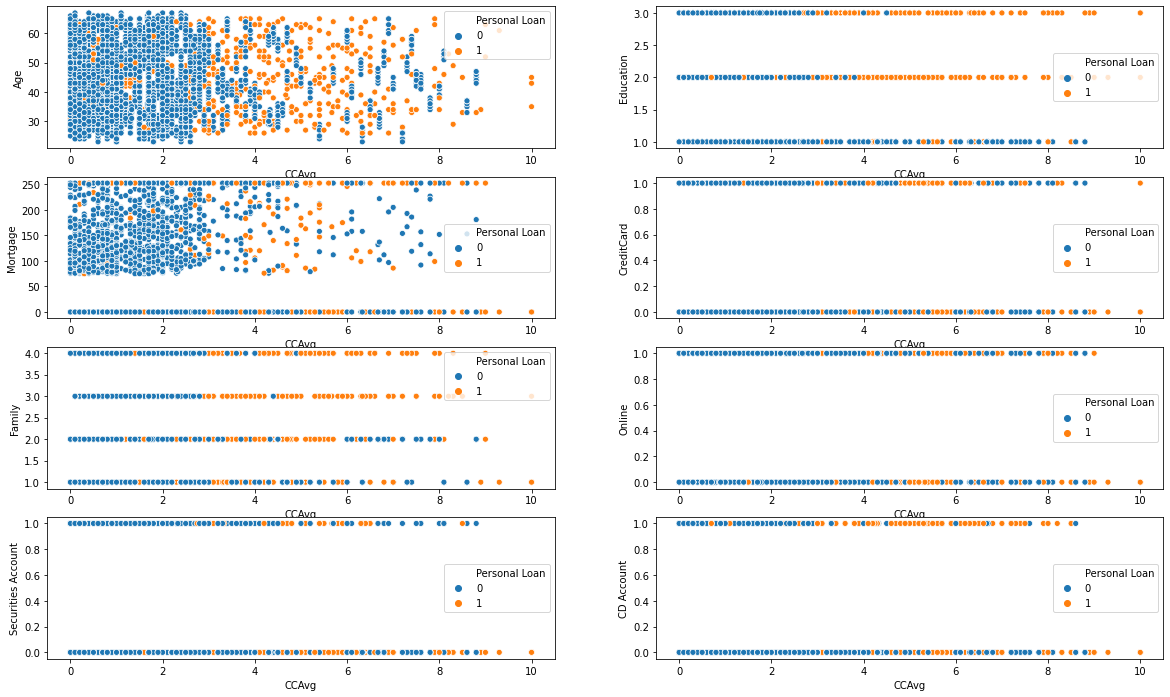

In [26]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots(4, 2)
fig.set_figheight(12)
fig.set_figwidth(20)
sns.scatterplot(Data_Set['CCAvg'],Data_Set['Age'],hue=Data_Set['Personal Loan'],ax=ax[0][0])
sns.scatterplot(Data_Set['CCAvg'],Data_Set['Education'],hue=Data_Set['Personal Loan'],ax=ax[0][1])
sns.scatterplot(Data_Set['CCAvg'],Data_Set['Mortgage'],hue=Data_Set['Personal Loan'],ax=ax[1][0])
sns.scatterplot(Data_Set['CCAvg'],Data_Set['CreditCard'],hue=Data_Set['Personal Loan'],ax=ax[1][1])
sns.scatterplot(Data_Set['CCAvg'],Data_Set['Family'],hue=Data_Set['Personal Loan'],ax=ax[2][0])
sns.scatterplot(Data_Set['CCAvg'],Data_Set['Online'],hue=Data_Set['Personal Loan'],ax=ax[2][1])
sns.scatterplot(Data_Set['CCAvg'],Data_Set['Securities Account'],hue=Data_Set['Personal Loan'],ax=ax[3][0])
sns.scatterplot(Data_Set['CCAvg'],Data_Set['CD Account'],hue=Data_Set['Personal Loan'],ax=ax[3][1])
plt.legend()
plt.show()

### Observation : 9
<p style = "font-family:verdana;font-size: 18px">
<ul type="square" style = "font-family:verdana;font-size: 18px"><b> Age </b>
        <li>Age,Experience shows same pattern for Customers with Loan and Without Loan</li>
        </ul>
         <ul type="square" style = "font-family:verdana;font-size: 18px"> <b>Income with other Attributes</b>
        <li>Customers with high income having personal loans shows high spending on Credit Card and have high Mortgage</li>
        <li>Customers with high income and Family Size between 3-4 accepted loans than others</li>
        </ul>
          <ul type="square" style = "font-family:verdana;font-size: 18px"> <b>CCAvg with other Attributes</b>
         <li>Customers with Higher Education Level(Graduate & Professional)  and High CCAvg shows high acceptance of personal loans</li>
         <li>Customers with family size between 3-4 and high CCAvg shows high acceptance of personal loans</li>
        <li>Customers with CD Account and high average Credit card spending shows high acceptance of personal loans</li>
        </ul>
        </p>

###  <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;">Target Column Distribution

In [27]:
Data_Set.groupby(['Personal Loan']).count()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507
1,480,480,480,480,480,480,480,480,480,480,480


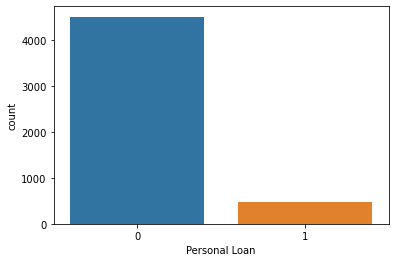

In [28]:
sns.countplot(Data_Set['Personal Loan'])

In [29]:
n_true = len(Data_Set.loc[Data_Set['Personal Loan'] == 1])
n_false = len(Data_Set.loc[Data_Set['Personal Loan'] == 0])
print("Number of Personal Opted cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of Personal Loan Opted cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of Personal Opted cases: 480 (9.63%)
Number of Personal Loan Opted cases: 4507 (90.37%)


### Observation : 10
<p style = "font-family:verdana;font-size: 18px"> Total 90% Customers have not opted the Personal Loan in the Data Set as from the above distribution.The DataSet given is Imbalance DataSet</p>
<p style = "font-family:verdana;font-size: 18px">In Below sections we'll deal with  Logistic Regression,KNN,Naive Bayes (For Model Building) + Additional  SMOTE Algorithm( to deal with this Imbalance Data )</p>

###  <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;">Experience Attribute Cleaning</span>

<b> MultiCollinearity </b> between the Age and Experience  - So we'll include any one of them.
Doing Hypothesis test for Experience attribute effect on the Personal Loan -Test Used <b> 2 Sample T Test </b>

In [30]:
# Here doing hypothesis Testing whether the Experience have effect on the person who takes loan and who don't take loan
# Null Hypothesis : Variation of Experience have same effect on the Persons with loans and without loans
# 2 Sample T-Test and α= 0.05
experienced=Data_Set[Data_Set['Personal Loan']==1]['Experience']
non_experienced=Data_Set[Data_Set['Personal Loan']==0]['Experience']
t_stat,p_value=ttest_ind(experienced,non_experienced)
print("P_Value::",p_value)
#step-5 compare with α Value
if(p_value< 0.05):
    print(color.BOLD+"\nReject Null Hypothesis(Ho) : Variation in Experience of Personal Loan takers and non-takers are same (No effect)\nConclusion : Variation of Experience have not the same effect on personal loan takers"+color.END)
else:
    print(color.BOLD+"\nFailed to reject Null Hypothesis(Ho) : Variation in Experience of Personal Loan takers and non-takers are same (No effect)\n Conclusion : Variation of Experience have the same effect on personal loan takers"+color.END)


P_Value:: 0.5863266672510148

Failed to reject Null Hypothesis(Ho) : Variation in Experience of Personal Loan takers and non-takers are same (No effect)
 Conclusion : Variation of Experience have the same effect on personal loan takers


As From the above Null Hypothesis Test Experience have the same effect on Personal Loan Takers. So Instead of Cleaning Experience Attribute we are removing the attribute from data in model building

In [31]:
#Splitting Data Removing Experience & Target Column
X = Data_Set.drop(['Experience','Personal Loan'],axis=1)     # Predictor feature columns (8 X m)
Y = Data_Set['Personal Loan'] 
print(X.shape)
print(Y.shape)

(4987, 10)
(4987,)


###  <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;">Splitting the Data</span>

Splitting data here into 70% and 30%

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
#Checking the Split of Data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(Data_Set.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(Data_Set.index)) * 100))

69.98% data is in training set
30.02% data is in test set


###  <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;">Model Building</span>

#### Logistic Regression . Naive Bayes & KNN Model Building

In [33]:
#Logistic Regression
logistic_model=LogisticRegression(solver="liblinear")
logistic_model.fit(x_train, y_train)
y_predict_logistic = logistic_model.predict(x_test)



#Naive Bayes
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)
y_predict_nb = NB_model.predict(x_test)

Here Based Upon the K Value Graph Taking K=11


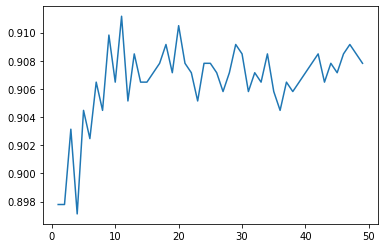

In [34]:
# Choosing best K Value
scores =[]
for k in range(1,50):
    KNN_model = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    KNN_model.fit(x_train, y_train)
    scores.append(KNN_model.score(x_test, y_test))
plt.plot(range(1,50),scores)

print('Here Based Upon the K Value Graph Taking K=11')
#K-NN
KNN_model = KNeighborsClassifier(n_neighbors= 11 , weights = 'distance' )
KNN_model.fit(x_train, y_train)
y_predict_knn = KNN_model.predict(x_test)

##### Confusion Matrix Comparison

Text(0.5, 1.0, 'Naive Bayes  Confusion Matrix')

<Figure size 1440x1440 with 0 Axes>

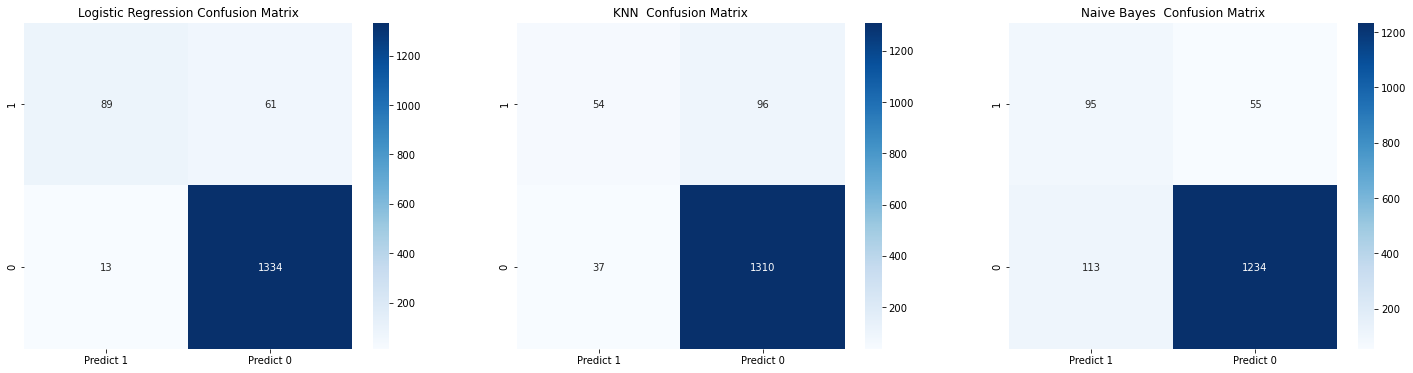

In [35]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(25)
#Logistic Regression
cm_logistic=metrics.confusion_matrix(y_test, y_predict_logistic, labels=[1, 0])
logistic_cm = pd.DataFrame(cm_logistic, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(logistic_cm, annot=True,fmt='g',cmap='Blues',ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')

# KNN Model
cm_knn=metrics.confusion_matrix(y_test,y_predict_knn,labels=[1, 0])
knn_cm=pd.DataFrame(cm_knn, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(knn_cm, annot=True,fmt='g',cmap='Blues',ax=ax[1])
ax[1].set_title('KNN  Confusion Matrix')

# NAive Bayes Model
cm_nb=metrics.confusion_matrix(y_test,y_predict_nb,labels=[1, 0])
nb_cm=pd.DataFrame(cm_nb, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(nb_cm, annot=True,fmt='g',cmap='Blues',ax=ax[2])
ax[2].set_title('Naive Bayes  Confusion Matrix')

### Observation : 11
<ul type="square" style = "font-family:verdana;font-size: 18px">Confusion Matrix Of Logistic regression
        <li>True Positive : 89</li>
        <li>False Positive :  13 - Type -I Error - i.e,, 13 People are falsely predicted as liable customers but they won't</li>
        <li>True Negative : 1334</li>
        <li>False Negative : 61 - Type -II Error, 61 People are falsely predicted who will not take loan but they will take</li>
        </ul>
  <ul type="square" style = "font-family:verdana;font-size: 18px">Confusion Matrix Of KNN regression
        <li>True Positive : 54</li>
        <li>False Positive :  37 - Type -I Error - 37 People are falsely predicted as liable customers but they won't</li>
        <li>True Negative : 1310</li>
        <li>False Negative : 96 - Type -II Error - 96 People are falsely predicted who will not take loan but they will take</li>
        </ul>
   <ul type="square" style = "font-family:verdana;font-size: 18px">Confusion Matrix Of Naive Bayes regression
        <li>True Positive : 95</li>
        <li>False Positive :  113 - Type -I Error - 113 People are falsely predicted as liable customers but they won't</li>
        <li>True Negative : 1234</li>
        <li>False Negative : 55 - Type -II Error - 55 People are falsely predicted who will not take loan but they will take</li>
        </ul>

##### ROC & AUC Curves for Models

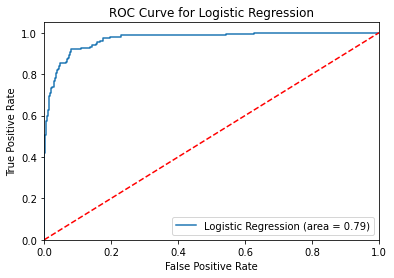

In [36]:
logit_roc_auc = roc_auc_score(y_test, logistic_model.predict(x_test))
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, logistic_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr_log, tpr_log, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

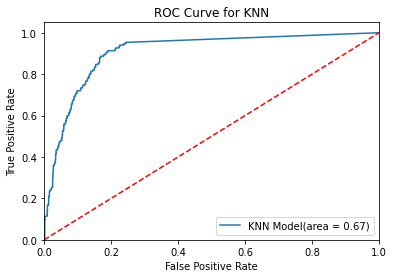

In [37]:
knn_roc_auc = roc_auc_score(y_test, KNN_model.predict(x_test))
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, KNN_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr_knn, tpr_knn, label='KNN Model(area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

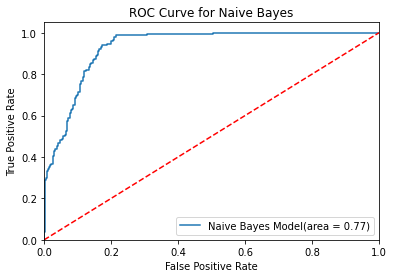

In [38]:
nb_roc_auc = roc_auc_score(y_test, NB_model.predict(x_test))
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, NB_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes Model(area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Observation : 12
<p>
<ul type="square" style = "font-family:verdana;font-size: 18px">ROC Curves Comparision
        <li>As we compare the above ROC Curve's for all models we can say that ROC Curve for the Logistic Regression is close to Left Top most Corner</li></ul>
 </p>
 <p>
    <b>Note:</b> The ROC Curve which is closer to the top most corner of the graph is the best model than other comparable models
</p>
     

##### Scores & Accuracy Comparision

In [39]:
print(color.BOLD+'Classification Report For Logistic Regression: \n'+color.END,metrics.classification_report(y_test, y_predict_logistic))
print(color.BOLD+'Classification Report For KNN: \n'+color.END,metrics.classification_report(y_test, y_predict_knn))
print(color.BOLD+'Classification Report For Naive Bayes: \n'+color.END,metrics.classification_report(y_test, y_predict_nb))

Classification Report For Logistic Regression: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1347
           1       0.87      0.59      0.71       150

    accuracy                           0.95      1497
   macro avg       0.91      0.79      0.84      1497
weighted avg       0.95      0.95      0.95      1497

Classification Report For KNN: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1347
           1       0.59      0.36      0.45       150

    accuracy                           0.91      1497
   macro avg       0.76      0.67      0.70      1497
weighted avg       0.90      0.91      0.90      1497

Classification Report For Naive Bayes: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1347
           1       0.46      0.63      0.53       150

    accuracy                           0.89      1497
   ma

In [40]:
logistic_score = logistic_model.score(x_test, y_test)
print(color.BOLD+'Score For the Logistic Model on Test Data::'+color.END,logistic_score)

knn_score=KNN_model.score(x_test, y_test)
print(color.BOLD+'Score For the KNN Model on Test Data::'+color.END,knn_score)

nbb_score=NB_model.score(x_test, y_test)
print(color.BOLD+'Score For the Naive Bayes on Test Data::'+color.END,nbb_score)

Score For the Logistic Model on Test Data:: 0.9505678022712091
Score For the KNN Model on Test Data:: 0.9111556446225785
Score For the Naive Bayes on Test Data:: 0.8877755511022044


In [41]:
logistic_score_train = logistic_model.score(x_train, y_train)
print(color.BOLD+'Score For the Logistic Model on Train Data::'+color.END,logistic_score_train)

knn_score_train=KNN_model.score(x_train, y_train)
print(color.BOLD+'Score For the KNN Model on Train Data::'+color.END,knn_score_train)

nbb_score_train=NB_model.score(x_train, y_train)
print(color.BOLD+'Score For the Naive Bayes on Train Data::'+color.END,nbb_score_train)

Score For the Logistic Model on Train Data:: 0.9472779369627508
Score For the KNN Model on Train Data:: 1.0
Score For the Naive Bayes on Train Data:: 0.8882521489971347


### Observation : 13 - BEST MODEL - LOGISTIC REGRESSION - REASONS
<p style = "font-family:verdana;font-size: 18px"> 
<ul type="square" style = "font-family:verdana;font-size: 18px">
      <li>As from the Observation-11 my reason to select the LOGISTIC REGRESSION as the best model is False Positive rate is   less compared to KNN,Naive Bayes Models</li>
    <li>i.e., from the Observation-11 Logistic Regression Model giving loan to non-liable customer is less (only 13 customers are given loan but they are not liable).Here I'm considering the min Type-I error</li>
     <li>i.e., from the Observation-12 According to the ROC Curve graph the Logistic Regression curve is closer to top most corner (i,e,, (0,1))</li>
    <li>From above accuracy Score Logistic Model have nearly 95% accuracy score on train data and 95% on test Data i.ee Almost same - Neither underfit nor overfit. For KNN we can see data is overfit. Naive Bayes also almost same between train and test data</li>
    <li>But among the Logistic and Naive Bayes based upon all the above Logistic Regression is the better Model</li>
  </ul>
</p>

### ADDITIONAL - Dealing with IMBALANCE MODEL - SMOTE MODEL

In [42]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
sm = SMOTE(random_state = 2)
x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train.ravel()) 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1))) 
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_smote == 0))) 

Before OverSampling, counts of label '1': 330
Before OverSampling, counts of label '0': 3160 

After OverSampling, counts of label '1': 3160
After OverSampling, counts of label '0': 3160 

